# cat- dog classification

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
path1 = r"C:\5 Machine Learning\DL\archive (5)\training_set\training_set"   

cate = ['cats','dogs']                                              

In [3]:
for i in cate:
    folders = os.path.join(path1, i)
    print(folders)

C:\5 Machine Learning\DL\archive (5)\training_set\training_set\cats
C:\5 Machine Learning\DL\archive (5)\training_set\training_set\dogs


In [5]:
for i in cate:
    folders = os.path.join(path1,i)                
    for image in os.listdir(folders):
        image_path = os.path.join(folders,image)
        print(image_path)                          

C:\5 Machine Learning\DL\archive (5)\training_set\training_set\cats\cat.1055.jpg
C:\5 Machine Learning\DL\archive (5)\training_set\training_set\cats\cat.1056.jpg
C:\5 Machine Learning\DL\archive (5)\training_set\training_set\cats\cat.1057.jpg
C:\5 Machine Learning\DL\archive (5)\training_set\training_set\cats\cat.1058.jpg
C:\5 Machine Learning\DL\archive (5)\training_set\training_set\cats\cat.1059.jpg
C:\5 Machine Learning\DL\archive (5)\training_set\training_set\cats\cat.106.jpg
C:\5 Machine Learning\DL\archive (5)\training_set\training_set\cats\cat.1060.jpg
C:\5 Machine Learning\DL\archive (5)\training_set\training_set\cats\cat.1061.jpg
C:\5 Machine Learning\DL\archive (5)\training_set\training_set\cats\cat.1062.jpg
C:\5 Machine Learning\DL\archive (5)\training_set\training_set\cats\cat.1063.jpg
C:\5 Machine Learning\DL\archive (5)\training_set\training_set\cats\cat.1064.jpg
C:\5 Machine Learning\DL\archive (5)\training_set\training_set\cats\cat.1065.jpg
C:\5 Machine Learning\DL\arch

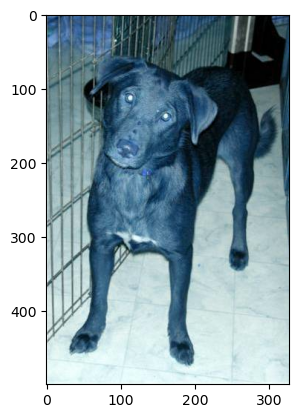

In [6]:
for i in cate:
    folders = os.path.join(path1,i)
    for image in os.listdir(folders):           
        image_path = os.path.join(folders,image)
        image_array = cv2.imread(image_path)     
        plt.imshow(image_array)
        break

In [8]:
image_size = 250

Value for label is  0
Value for label is  1


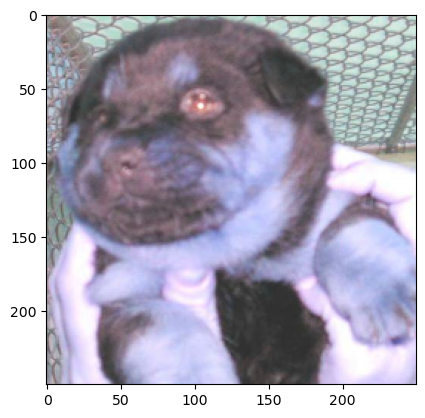

In [9]:
input_image = []

for i in cate:
    folders= os.path.join(path1,i)
    label = cate.index(i)                                                           
    print('Value for label is ', label)
    for image in os.listdir(folders):
        image_path = os.path.join(folders, image)
        image_array = cv2.imread(image_path)                                         
        image_array = cv2.resize(image_array, (image_size, image_size))             
        input_image.append([image_array,label])                                    
        plt.imshow(image_array)

In [10]:
len(input_image)

7942

In [11]:
np.random.shuffle(input_image)

In [12]:
input_image

[[array([[[138, 143, 142],
          [138, 143, 142],
          [138, 143, 142],
          ...,
          [161, 161, 161],
          [161, 161, 161],
          [161, 161, 161]],
  
         [[138, 143, 142],
          [138, 143, 142],
          [138, 143, 142],
          ...,
          [161, 161, 161],
          [161, 161, 161],
          [161, 161, 161]],
  
         [[138, 143, 142],
          [138, 143, 142],
          [138, 143, 142],
          ...,
          [161, 161, 161],
          [161, 161, 161],
          [161, 161, 161]],
  
         ...,
  
         [[112, 116, 111],
          [113, 117, 112],
          [114, 118, 113],
          ...,
          [160, 163, 168],
          [162, 165, 170],
          [162, 165, 170]],
  
         [[115, 119, 114],
          [115, 119, 114],
          [117, 121, 116],
          ...,
          [160, 163, 168],
          [164, 167, 172],
          [164, 167, 172]],
  
         [[118, 122, 117],
          [118, 122, 117],
          [120, 124, 119

In [14]:
X =[]
Y =[]

for X_values, labels in input_image:
    X.append(X_values)
    Y.append(labels)

In [15]:
X = np.array(X)
Y = np.array(Y)

In [16]:
X.shape

(7942, 250, 250, 3)

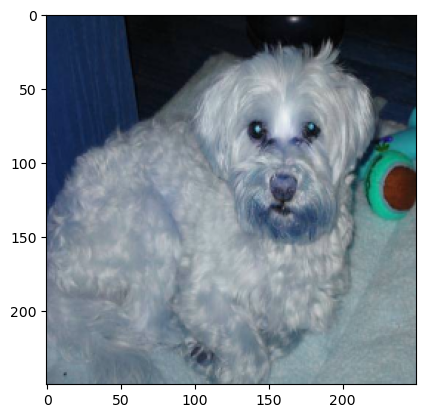

In [18]:
plt.imshow(X[2511])

In [19]:
from keras.models import Sequential
from keras.layers import Conv2D , MaxPool2D, Flatten, Dense, Dropout

In [20]:
from tensorflow.keras.utils import to_categorical

In [21]:
model = Sequential()

model.add(Conv2D(filters = 8, kernel_size =(5,5), input_shape=(250,250,3), activation='relu', padding= 'same'))
model.add(MaxPool2D(pool_size= (3,3)))
model.add(Flatten())

model.add(Dense(128, activation ='relu'))
model.add(Dense(2, activation = 'softmax'))

C:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
model.fit(X,Y, epochs=10)

Epoch 1/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 76s 274ms/step - accuracy: 0.5550 - loss: 192.7173
Epoch 2/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 417s 2s/step - accuracy: 0.7355 - loss: 0.5837
Epoch 3/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 65s 260ms/step - accuracy: 0.8097 - loss: 0.3859
Epoch 4/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 66s 263ms/step - accuracy: 0.8881 - loss: 0.2632
Epoch 5/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 65s 261ms/step - accuracy: 0.9171 - loss: 0.2110
Epoch 6/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 65s 260ms/step - accuracy: 0.9328 - loss: 0.1749
Epoch 7/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 64s 257ms/step - accuracy: 0.9280 - loss: 0.1773
Epoch 8/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 67s 264ms/step - accuracy: 0.9535 - loss: 0.1355
Epoch 9/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 65s 260ms/step - accuracy: 0.9533 - loss: 0.1231
Epoch 10/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 66s 266ms/step - accuracy: 0.9392 - loss: 0.1597


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 250, 250, 8)         │             608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 83, 83, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 55112)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       7,054,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,165,992 (80.74 MB)

 Trainable params: 7,055,330 (26.91 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,110,662 (53.83 MB)

In [25]:
# for prediction
pred_values = model.predict(X)

249/249 ━━━━━━━━━━━━━━━━━━━━ 24s 87ms/step


In [26]:
pred_values

array([[9.9056214e-01, 9.4378581e-03],
       [3.2171494e-04, 9.9967825e-01],
       [6.0183775e-10, 1.0000000e+00],
       ...,
       [4.4671771e-01, 5.5328232e-01],
       [8.1541045e-03, 9.9184591e-01],
       [3.4809479e-01, 6.5190518e-01]], dtype=float32)

In [27]:
pred_classes = np.argmax(pred_values, axis=1)

In [28]:
pred_classes

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
cm = confusion_matrix(Y, pred_classes)

In [31]:
cm

array([[2776, 1161],
       [   7, 3998]], dtype=int64)

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
accuracy_score(Y, pred_classes)*100

85.29337698312767

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
our model says it is a DOG


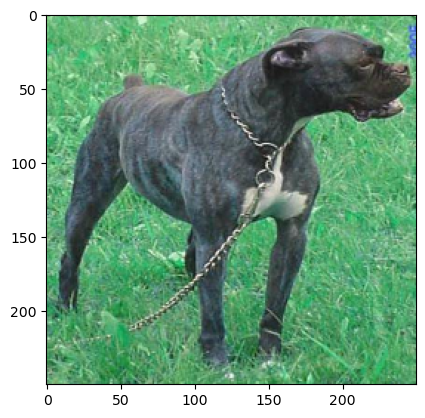

In [38]:
idx2 = random.randint(0,len(Y))
plt.imshow(X[idx2 , :])
plt.show

y_pred = model.predict(X[idx2, :].reshape(1,250,250,3))
y_pred = y_pred > 0.5
if y_pred[0][0] == True and y_pred[0][1] == False:
    print('our model says it is a CAT')
else:
    print('our model says it is a DOG')